###As of 7/22/16

In [2]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import gotranJIT
from gotran.model.loadmodel import load_ode

In [5]:
import analyzeODE as ao
import numpy as np
import matplotlib.pylab as plt

In [6]:
from analyzeODE import PlotMorotti

In [7]:
import Case 
cases = dict()
class empty:pass

In [8]:
font = {'weight' : 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)

###Figure 1

In [9]:
caseWT = empty()
caseWT.caseName = "mouse_leak1p00x_nka1p00_freq1p0_dc_cat" 
caseWT.fileName = caseWT.caseName+".pickle"
caseWT.data = ao.readPickle(caseWT.fileName) 

Reading mouse_leak1p00x_nka1p00_freq1p0_dc_cat.pickle


In [10]:
caseAmylin = empty()
caseAmylin.caseName = "mouse_leak1p425_nka1p21_hip1p00_freq1p0_dc_cat" 
caseAmylin.fileName = caseAmylin.caseName+".pickle"
caseAmylin.data = ao.readPickle(caseAmylin.fileName) 

Reading mouse_leak1p425_nka1p21_hip1p00_freq1p0_dc_cat.pickle


In [11]:
caseHIP = empty()
caseHIP.caseName = "mouse_leak1p425_nka1p21_hip0p50_freq1p0_dc_cat" 
caseHIP.fileName = caseHIP.caseName+".pickle"
caseHIP.data = ao.readPickle(caseHIP.fileName) 

Reading mouse_leak1p425_nka1p21_hip0p50_freq1p0_dc_cat.pickle


In [28]:
def Plot3PickleData(data1,data2=None,data3=None,idxName="V",ylabel="V (mV)",trange=None,
    case1legend = None, case2legend=None, case3legend=None, minOn=0
    ):

  #  idx1=runner.model.state_indices(idxName)     
  # fluxes
  ms_to_s = 1e-3
  mM_to_uM = 1e-3
  s_to_min = 60
  class empty:pass

  def mycont(data):
    datac = empty()
    if minOn:
        datac.t = data['t'] * ms_to_s / s_to_min
    else:
        datac.t = data['t'] * ms_to_s
    datac.s = data['s'] #/ mM_to_uM
    datac.s_idx = data['s_idx']
    datac.j = data['j']
    datac.j_idx = data['j_idx']

    if idxName in datac.j_idx:
      datac.v = datac.j
      datac.v_idx = datac.j_idx
    # states 
    elif idxName in datac.s_idx:
      datac.v = datac.s
      datac.v_idx = datac.s_idx
    else:
      print idxName, " not found"
      datac.v =None

    return datac

  datac1 = mycont(data1)
  if data2!=None:
    datac2 = mycont(data2)
  if data3!=None:
    datac3 = mycont(data3)

  fig = plt.figure()

  if trange==None:
    fig.add_subplot(111)

  else:
    trange = np.asarray(trange)
    plt.subplot(1,2,2)
    if datac1.v !=None:
      idx1 = datac1.v_idx.index(idxName)
      plt.plot(datac1.t,datac1.v[:,idx1],'k',label=case1legend)
    if data2!=None and datac2.v !=None:
      idx2 = datac2.v_idx.index(idxName)
      plt.plot(datac2.t,datac2.v[:,idx2],'b',label=case2legend)
    if data3!=None and datac3.v !=None:
      idx3 = datac3.v_idx.index(idxName)
      plt.plot(datac3.t,datac3.v[:,idx3],'r',label=case3legend)
    if minOn:
        plt.xlim(trange*ms_to_s/s_to_min)
        plt.xlabel('time [min]', weight="bold",fontsize=14)
    else:
        plt.xlim(trange*ms_to_s)
        plt.xlabel('time [s]', weight="bold",fontsize=14)
#    plt.ylim(-100,75)
    pyplot.locator_params(nbins=5)
    plt.legend(loc=0)
#    plt.legend(loc=3)
#    plt.ylim(0.10,0.75)
#    plt.ylim(10.5,11.5)
#    plt.ylim(0.0,0.16)
#    plt.subplot(1,2,1)

  
  plt.ylabel(ylabel, weight="bold",fontsize=14)
#  plt.ylabel(ylabel+" [mM]", weight="bold",fontsize=14)
#  plt.legend(loc=3)
  plt.tight_layout()

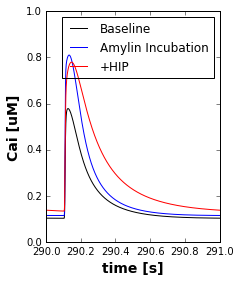

In [11]:
states = ["Cai"]
for i,state in enumerate(states):
        Plot3PickleData(caseWT.data,data2=caseAmylin.data,data3=caseHIP.data,idxName=state, 
                          ylabel=state,trange=[290e3,291e3],
                          case1legend="Baseline",
                          case2legend="Amylin Incubation",
                          case3legend="+HIP")
        outFile="compare_%s.png"%state
       # plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

###Figure 2

In [7]:
leak=np.linspace(0.5, 1.5, 11)
print leak
leak_ref=1.425

[ 0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5]


In [ ]:
import downSamplePickles
case1Hz = empty()
root = "/home/cesc235/wholecell/wholecell/"
percents = ['0p50', '0p60', '0p70', '0p80', '0p90', '1p00','1p10','1p20','1p30','1p40','1p50']
#percents = ['0p50', '0p60', '0p70']
num_percents = len(percents)
print num_percents
#maxCai = np.zeros((num_percents, num_percents))
#minCai = np.zeros((num_percents, num_percents))
diffCai = np.zeros((num_percents, num_percents))
diffCaSR = np.zeros((num_percents, num_percents))
maxCaSR_all = np.zeros((num_percents, num_percents))
minCaSR_all = np.zeros((num_percents, num_percents))
#print np.shape(fileNames)

for (i ,percent_i) in enumerate(percents):
    for (j, percent_j) in enumerate(percents):
    #print percent
        #print i, j
        file = "mouse_leak%sx_nka%s_freq1p0_dc_cat.pickle"%(percent_i,percent_j)

        #reducedFile = file.replace(".pickle","_red.pickle")

        if 0:
            #for i,file in enumerate(files):
            fileName = root+file
            print fileName
            downSamplePickles.downsample(fileName,10)
        #print reducedFile
        
        #case1Hz.fileName = root+reducedFile
        case1Hz.fileName = root+file
        case1Hz.data = ao.readPickle(case1Hz.fileName)
        #print case1Hz.fileName
            
        s = case1Hz.data['s']
        s_idx = case1Hz.data['s_idx']
        idx = s_idx.index("Cai")  
        maxCai = np.amax(s[100e3:100.5e3,idx])
        #print maxCai
        minCai = np.amin(s[100e3:100.5e3,idx])
        #print minCai 
        diffCai[i,j] = maxCai - minCai
        #print diffCai
        
        s = case1Hz.data['s']
        s_idx = case1Hz.data['s_idx']
        idx = s_idx.index("Ca_SR")
        maxCaSR = np.amax(s[100e3:100.5e3,idx])
        #print maxCai
        minCaSR = np.amin(s[100e3:100.5e3,idx])
        #print minCai
        maxCaSR_all[i,j] = maxCaSR
        minCaSR_all[i,j] = minCaSR
        diffCaSR[i,j] = maxCaSR - minCaSR
        
print diffCai
print diffCaSR

11
Reading /home/cesc235/wholecell/wholecell/mouse_leak0p50x_nka0p50_freq1p0_dc_cat.pickle
Reading /home/cesc235/wholecell/wholecell/mouse_leak0p50x_nka0p60_freq1p0_dc_cat.pickle
Reading /home/cesc235/wholecell/wholecell/mouse_leak0p50x_nka0p70_freq1p0_dc_cat.pickle
Reading /home/cesc235/wholecell/wholecell/mouse_leak0p50x_nka0p80_freq1p0_dc_cat.pickle
Reading /home/cesc235/wholecell/wholecell/mouse_leak0p50x_nka0p90_freq1p0_dc_cat.pickle
Reading /home/cesc235/wholecell/wholecell/mouse_leak0p50x_nka1p00_freq1p0_dc_cat.pickle
Reading /home/cesc235/wholecell/wholecell/mouse_leak0p50x_nka1p10_freq1p0_dc_cat.pickle
Reading /home/cesc235/wholecell/wholecell/mouse_leak0p50x_nka1p20_freq1p0_dc_cat.pickle
Reading /home/cesc235/wholecell/wholecell/mouse_leak0p50x_nka1p30_freq1p0_dc_cat.pickle

In [ ]:
s = caseAmylin.data['s']
s_idx = caseAmylin.data['s_idx']
idx = s_idx.index("Cai")  
maxCai_amy = np.amax(s[100e3:100.5e3,idx])
print maxCai_amy
minCai_amy = np.amin(s[100e3:100.5e3,idx])
print minCai_amy
diffCai_amy = maxCai_amy - minCai_amy
print diffCai_amy
        
idx = s_idx.index("Ca_SR")
maxCaSR_amy = np.amax(s[100e3:100.5e3,idx])
print maxCaSR_amy
minCaSR_amy = np.amin(s[100e3:100.5e3,idx])
print minCaSR_amy
diffCaSR_amy = maxCaSR_amy - minCaSR_amy
print diffCaSR_amy

In [ ]:
s = caseHIP.data['s']
s_idx = caseHIP.data['s_idx']
idx = s_idx.index("Cai")  
maxCai_hip = np.amax(s[100e3:100.5e3,idx])
print maxCai_hip
minCai_hip = np.amin(s[100e3:100.5e3,idx])
print minCai_hip
diffCai_hip = maxCai_hip - minCai_hip
print diffCai_hip
        
idx = s_idx.index("Ca_SR")
maxCaSR_hip = np.amax(s[100e3:100.5e3,idx])
print maxCaSR_hip
minCaSR_hip = np.amin(s[100e3:100.5e3,idx])
print minCaSR_hip
diffCaSR_hip = maxCaSR_hip - minCaSR_hip
print diffCaSR_hip

In [ ]:
ax1 = plt.subplot(1,1,1)
ax1.plot(leak,minCaSR_all[:,5],'--',color='brown',label='Minima')
ax1.plot(leak,maxCaSR_all[:,5],'-.',color='brown',label='Maxima')
#ax1.legend(bbox_to_anchor=(1.75,1.0),fancybox=True, shadow=True)
ax1.legend(loc=2)

ax2 = ax1.twinx()


ax2.plot(leak[5],diffCaSR[5,5],'ks',ms=10,label='Baseline')
ax2.legend(loc=3)

ax2.plot(leak_ref,diffCaSR_amy,'bs',ms=10,label='+Amy')
ax2.legend(loc=3)

ax2.plot(leak_ref,diffCaSR_hip,'rs',ms=10,label='+HIP')
ax2.legend(loc=3)

ax2.plot(leak,diffCaSR[:,5],'o',color='brown',label='$\Delta$(Ca_SR)')
ax2.legend(loc=5)
#ax2.legend(bbox_to_anchor=(1.9,0.75),fancybox=True, shadow=True)

ax1.set_xlim([0.4,2.0])
ax1.set_ylim([0.2,0.75])
ax2.set_ylim([0.2,0.45])
ax1.set_ylabel("Ca_SR [mM]",fontsize=16,weight="bold")
ax1.set_xlabel("Ca2+ Leak Rate",fontsize=16,weight="bold")
#ax1.set_title("Ca_SR")
ax2.set_ylabel("$\Delta$(Ca_SR) [mM]",fontsize=16,weight="bold")

outFile='diff_CaSRConc.png'
plt.tight_layout()
#plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

###Figure S16

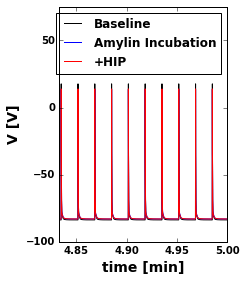

In [43]:
states = ["V"]
for i,state in enumerate(states):
        Plot3PickleData(caseWT.data,data2=caseAmylin.data,data3=caseHIP.data,idxName=state, 
                          ylabel=state,trange=[290e3,300e3],
                          case1legend="Baseline",
                          case2legend="Amylin Incubation",
                          case3legend="+HIP")
        outFile="compare_%s.png"%state
        plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

###Figure S17

In [9]:
caseLCC = empty()
caseLCC.caseName = "mouse_leak1p00x_lcc1p25_freq1p0_dc_cat" 
caseLCC.fileName = caseLCC.caseName+".pickle"
caseLCC.data = ao.readPickle(caseLCC.fileName) 

Reading mouse_leak1p00x_lcc1p25_freq1p0_dc_cat.pickle


In [51]:
def Plot2PickleData(data1,data2=None,idxName="V",ylabel="V (mV)",trange=None,
    case1legend = None, case2legend=None, case3legend=None, 
    ):

  #  idx1=runner.model.state_indices(idxName)     
  # fluxes
  ms_to_s = 1e-3
  #mM_to_uM = 1e-3
  #s_to_min = 60
  class empty:pass

  def mycont(data):
    datac = empty()
    datac.t = data['t'] * ms_to_s
    datac.s = data['s'] #/ mM_to_uM
    datac.s_idx = data['s_idx']
    datac.j = data['j']
    datac.j_idx = data['j_idx']

    if idxName in datac.j_idx:
      datac.v = datac.j
      datac.v_idx = datac.j_idx
    # states 
    elif idxName in datac.s_idx:
      datac.v = datac.s
      datac.v_idx = datac.s_idx
    else:
      print idxName, " not found"
      datac.v =None

    return datac

  datac1 = mycont(data1)
  if data2!=None:
    datac2 = mycont(data2)

  fig = plt.figure()

  if trange==None:
    fig.add_subplot(111)

  else:
    trange = np.asarray(trange)
    plt.subplot(1,2,2)
    if datac1.v !=None:
      idx1 = datac1.v_idx.index(idxName)
      plt.plot(datac1.t,datac1.v[:,idx1],'k',label=case1legend)
    if data2!=None and datac2.v !=None:
      idx2 = datac2.v_idx.index(idxName)
      plt.plot(datac2.t,datac2.v[:,idx2],'g',label=case2legend)

    plt.xlim(trange*ms_to_s)
    #plt.ylim(-100,75)
    pyplot.locator_params(nbins=5)
    #plt.legend(loc=0)

  plt.xlabel('time [ms]', weight="bold",fontsize=14)
  #plt.ylabel(ylabel+" [V]", weight="bold",fontsize=14)
#  plt.ylabel(ylabel+" [mM]", weight="bold",fontsize=14)
  plt.legend(loc=6)
  plt.tight_layout()

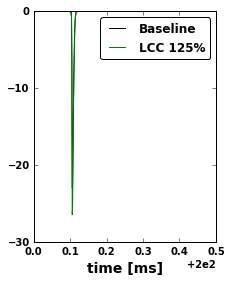

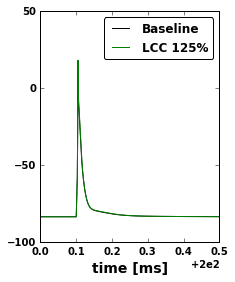

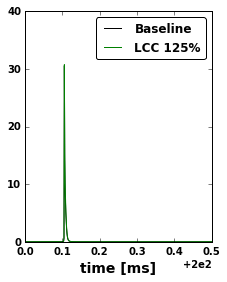

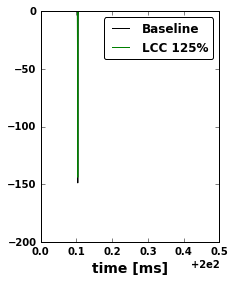

In [56]:
root="/net/share/shared/papers/despa/"
states = ["i_CaL","V","i_tof","i_Na"]
for i,state in enumerate(states):
        Plot2PickleData(caseWT.data,data2=caseLCC.data,idxName=state, 
                          ylabel=state,trange=[200e3,200.5e3],
                          case1legend="Baseline",
                          case2legend="LCC 125%")
       #plt.legend(bbox_to_anchor=(3.2,1.0),fancybox=True)#, shadow=True)
        legend= plt.legend(fancybox=True,shadow=False)
        # Put a nicer background color on the legend.
        legend.get_frame().set_facecolor('w')
        plt.tight_layout()
        #plt.gcf().savefig(root+"baseline_vs_IncrPCa_"+"_%s"%state+".png")
        outFile="/net/share/cesc235/pkh-lab-papers/150817_despa/figs/mouse/LCC_%s.png"%i
        #plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)   

###Figure S10

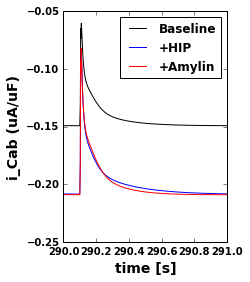

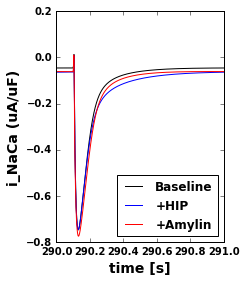

In [33]:
states = ["i_Cab","i_NaCa"]
for i,state in enumerate(states):
        Plot3PickleData(caseWT.data,data2=caseHIP.data,data3=caseAmylin.data,\
                        idxName=state, 
                          ylabel=state+" (uA/uF)",trange=[290.0e3,291e3],
                          case1legend="Baseline",
                          case2legend="+HIP",
                          case3legend="+Amylin")
       # plt.legend(bbox_to_anchor=(1.2,1.0),fancybox=True, shadow=True)
        plt.tight_layout()
        outFile="comp_%s.png"%state
        plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

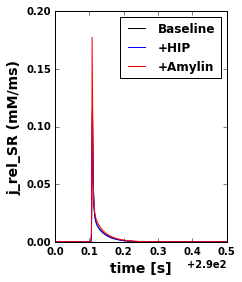

In [30]:
states = ["j_rel_SR"]
for i,state in enumerate(states):
        Plot3PickleData(caseWT.data,data2=caseHIP.data,data3=caseAmylin.data,\
                        idxName=state, ylabel=state+" (mM/ms)", 
                         trange=[290.0e3,290.5e3],
                          case1legend="Baseline",
                          case2legend="+HIP",
                          case3legend="+Amylin"
                         )
       # plt.legend(bbox_to_anchor=(1.2,1.0),fancybox=True, shadow=True)
        plt.tight_layout()
        outFile="comp_%s.png"%state
        plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)

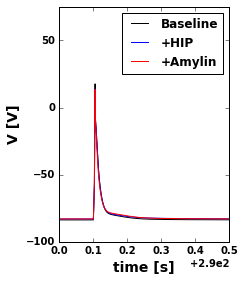

In [23]:
states = ["V"]
for i,state in enumerate(states):
        Plot3PickleData(caseWT.data,data2=caseHIP.data,data3=caseAmylin.data,\
                        idxName=state, 
                          ylabel=state,trange=[290.0e3,290.5e3],
                          case1legend="Baseline",
                          case2legend="+HIP",
                          case3legend="+Amylin"
                         )
       # plt.legend(bbox_to_anchor=(1.2,1.0),fancybox=True, shadow=True)
        plt.tight_layout()
   #     outFile="/net/share/shared/papers/despa/comp_%s.png"%state
        outFile="comp_%s.png"%state
        plt.gcf().savefig(outFile,bbox_extra_Artists=(),bbox_inches='tight',dpi=300)